In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

In [106]:
df_train = pd.read_csv('../heartECG_data/mitbih_train.csv')

In [107]:
df_train.shape

(87553, 188)

In [274]:
cols = [i for i in range(188)]
df_train.columns = cols

categories = list(df_train[cols[-1]].unique())

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
f0 = df_train[cols[-1]] == 0.0
cat_0 = df_train[f0].drop(187, axis=1)
m0 = cat_0.mean()
m0_c = 'blue'

f1 = df_train[cols[-1]] == 1.0
cat_1 = df_train[f1].drop(187, axis=1)
m1 = cat_1.mean()
m1_c = 'red'

f2 = df_train[cols[-1]] == 2.0
cat_2 = df_train[f2].drop(187, axis=1)
m2 = cat_2.mean()
m2_c = 'green'

f3 = df_train[cols[-1]] == 3.0
cat_3 = df_train[f3].drop(187, axis=1)
m3 = cat_3.mean()
m3_c = 'orange'

f4 = df_train[cols[-1]] == 4.0
cat_4 = df_train[f4].drop(187, axis=1)
m4 = cat_4.mean()[0:187]
m4_c = 'purple'

In [283]:
cat_4.iloc[:]

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
81122,0.712610,0.629032,0.527859,0.414956,0.284457,0.164223,0.080645,0.032258,0.000000,0.016129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81123,1.000000,0.484848,0.541667,0.526515,0.522727,0.507576,0.496212,0.412879,0.284091,0.140152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81124,0.584046,0.500000,0.424501,0.324786,0.233618,0.128205,0.049858,0.000000,0.000000,0.028490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81125,1.000000,0.936170,0.878598,0.813517,0.727159,0.607009,0.496871,0.365457,0.272841,0.232791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81126,0.680412,0.584192,0.491409,0.379725,0.269759,0.149485,0.072165,0.012027,0.000000,0.012027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


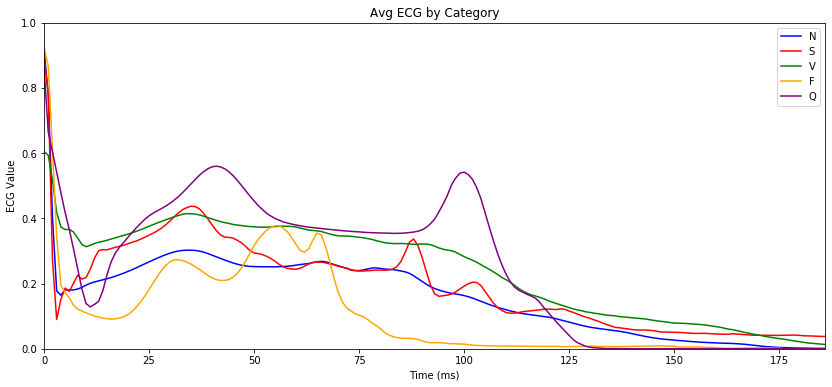

In [293]:
plt.figure(figsize=(14,6))

plt.xlabel('Time (ms)')
plt.ylabel('ECG Value')
plt.title('Avg ECG by Category')

plt.plot(m0, label='N', c=m0_c)
plt.plot(m1, label='S', c=m1_c)
plt.plot(m2, label='V', c=m2_c)
plt.plot(m3, label='F', c=m3_c)
plt.plot(m4, label='Q', c=m4_c)

ax = plt.gca()
ax.set_xlim([0, 186])
ax.set_ylim([0,1])

plt.legend()
plt.show()

In [299]:
def make_comp_graph(cat_df, avg_df, mc):
    plt.figure(figsize=(14,6))
    cat_index = np.random.randint(len(cat_df), size=8)

    i = 0
    total_mean = np.mean(avg_df)
    for index in cat_index:
        instance_mean = np.mean(cat_df.iloc[index])
        diff = total_mean - instance_mean #adjustment that will be made to graph
        plt.subplot(2,4,i+1)
        plt.plot(cat_df.iloc[index] + diff, label='Adjusted Sample', c='black') #plot adjusted instance to compare with mean
        plt.plot(avg_df, label='Category Mean', c=mc)
        ax = plt.gca()
        ax.set_xlim([0, 186])
        ax.set_ylim([0,1])
        i += 1
    plt.legend()

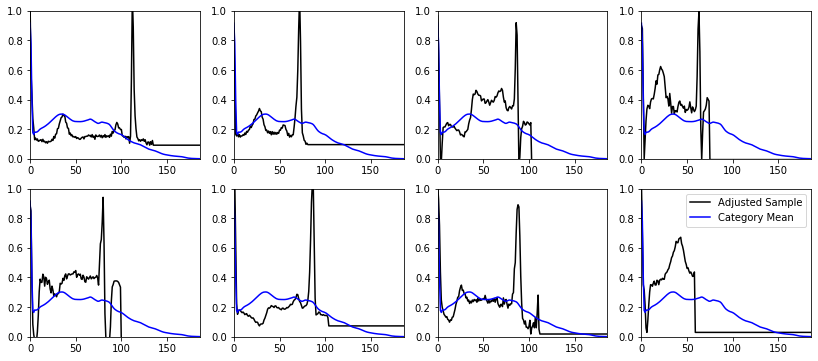

In [300]:
make_comp_graph(cat_0, m0, m0_c)

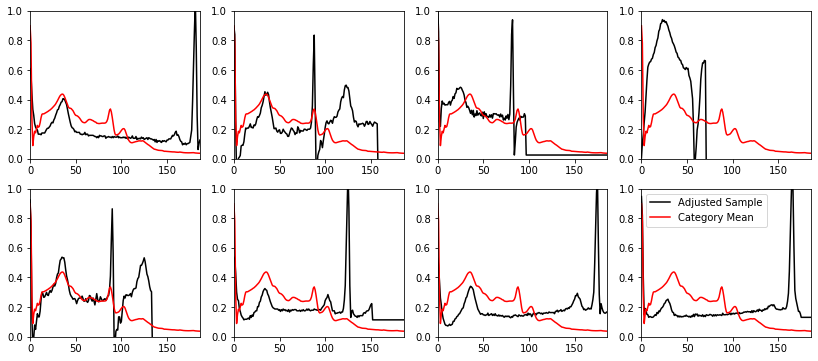

In [301]:
make_comp_graph(cat_1, m1, m1_c)

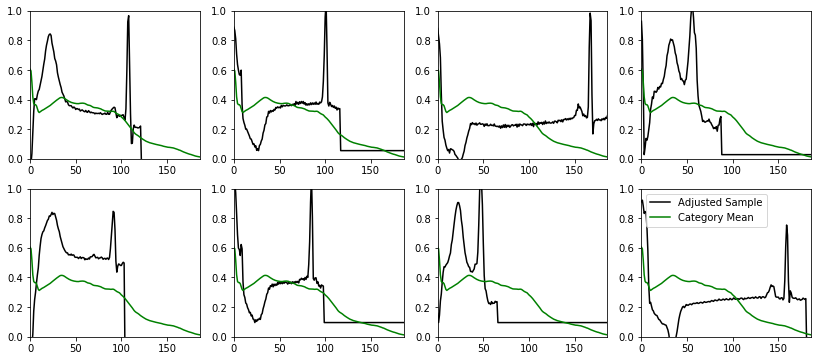

In [302]:
make_comp_graph(cat_2, m2, m2_c)

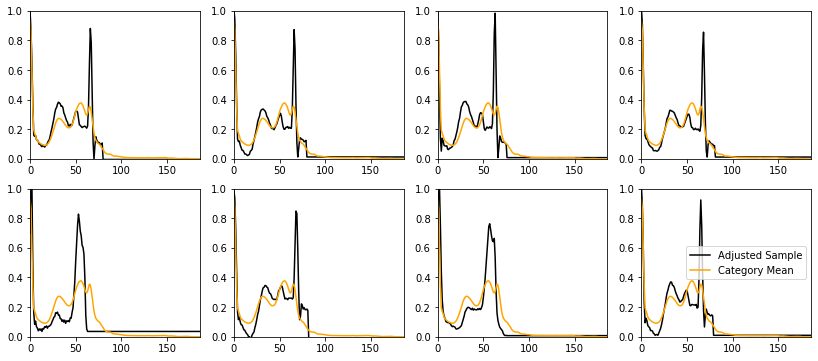

In [303]:
make_comp_graph(cat_3, m3, m3_c)

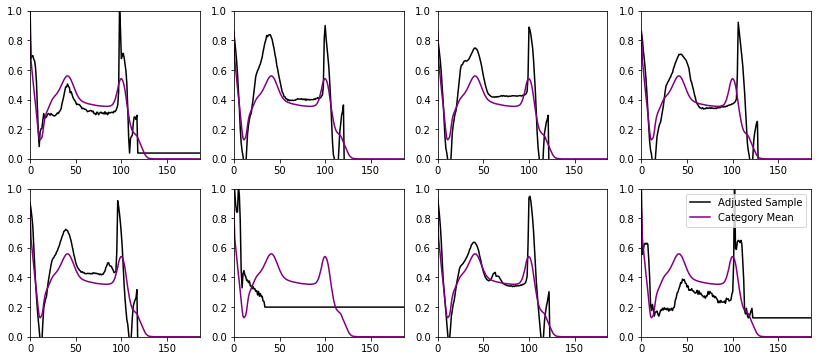

In [304]:
make_comp_graph(cat_4, m4, m4_c)